# Store Sales - Time Series Forecasting - Kaggle competition

Click <a href="https://www.kaggle.com/competitions/store-sales-time-series-forecasting">here</a> for a description of the grocery sales forecasting Kaggle's Competition.
Data are taken from Kaggle: 
click <a href="https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data">here</a> for an explanation of the  datasets.

## Table of Contents:
* [Load the Data](#first-bullet)
* [Exploratory Data Analysis and Data Visualisation](#second-bullet)
* [Handling Missing Values and Feature Engineering](#third-bullet)
* [ML - Random Forest and Gradient Boosting Regressions](#sixth-bullet)
* [Reformat the test data and make predictions](#seventh-bullet)

<h3 style='color:Red;'>&diams; Load the Data <a class="anchor" id="first-bullet"></a>



In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
# Dataframes

train = pd.read_csv('train.csv', index_col = 0)
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
hol = pd.read_csv('holidays_events.csv')
trans = pd.read_csv('transactions.csv')

In [3]:
# Top 5 elements of train

train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [4]:
# Shape of train: 3000888 rows and 5 columns

train.shape

(3000888, 5)

In [5]:
# Top 5 elements of stores

stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
# Shape of stores: 54 rows and 5 columns

stores.shape

(54, 5)

In [7]:
# Top 5 elements of hol 

hol.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
# Shape of hol:  350 rows and 6 columns

hol.shape

(350, 6)

In [9]:
# Top 5 of trans

trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
# Shape of trans: 83488 rows and 3 columns

trans.shape

(83488, 3)

In [11]:
# Load test data

test = pd.read_csv('test.csv', index_col = 0)

In [12]:
# Top 5 of test

test.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


<h3 style='color:Red;'>&diams; Exploratory Data Analysis and Data Visualisation <a class="anchor" id="second-bullet"></a>

In [13]:
train.head(3)

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0


In [14]:
# All products families

families = train['family'].unique()
families

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [15]:
total_families = len(families)
print(f'We have in total {total_families} product\'s families')

We have in total 33 product's families


In [16]:
# All different stores

stores_nbr = train['store_nbr'].unique()
stores_nbr

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [17]:
stores_nbr = len(stores_nbr)
print(f'We have in total {stores_nbr} different stores')

We have in total 54 different stores


In [18]:
# Import datetime 

from datetime import datetime

In [19]:
# From string to time-object type 

date_str = '2017-12-29' # The date - 29 Dec 2017
format_str = '%Y-%m-%d' # The format
datetime_obj = datetime.strptime(date_str, format_str)
print(datetime_obj.date())

2017-12-29


In [20]:
# Define str_date function: it transforms a string to a date in the specific format: '%Y-%m-%d'

def str_date(var):
    return datetime.strptime(var, '%Y-%m-%d')

In [21]:
# Apply str_date to date column and update that column

train['date'] = train['date'].apply(str_date)

In [22]:
# Define the time function: it extrapolates new time's features from date column

def time(df):
    #df['date'] = pd.to_datetime(df["date"])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_month'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.day_of_week
    
    
    
    return df

In [23]:
# Apply time function to train dataframe

train=time(train)
train.head(3)

,date,store_nbr,family,sales,onpromotion,year,month,day_of_month,day_of_week
id,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1


In [24]:
# Define a new column called 'month' containing months
#train['month'] = train['date'].apply(lambda x: x.month)

In [25]:
# Check our changes

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   year          int64         
 6   month         int64         
 7   day_of_month  int64         
 8   day_of_week   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 228.9+ MB


In [26]:
# Import visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
# Total sales and onpromotions per family

grouped_data = train.groupby('family').sum()[['sales','onpromotion']].reset_index()
grouped_data

C:\Users\giuli\AppData\Local\Temp\ipykernel_44240\1045535167.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = train.groupby('family').sum()[['sales','onpromotion']].reset_index()


,family,sales,onpromotion
0,AUTOMOTIVE,5.548220e+05,4783
1,BABY CARE,1.005100e+04,53
2,BEAUTY,3.378930e+05,13483
3,BEVERAGES,2.169545e+08,906958
4,BOOKS,6.438000e+03,0
5,BREAD/BAKERY,4.213395e+07,331289
6,CELEBRATION,7.611770e+05,6723
7,CLEANING,9.752129e+07,661157
8,DAIRY,6.448771e+07,728707
9,DELI,2.411032e+07,583316


In [28]:
# Set the background style

sns.set_style('darkgrid')

Text(0.5, 1.0, 'Total sales per family')

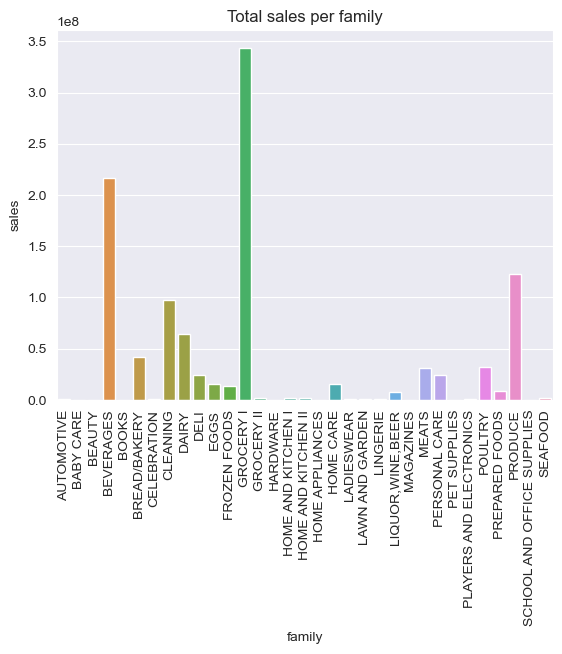

In [29]:
# Barplot of total sales per family

f=sns.barplot(data=grouped_data, x='family', y='sales')
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title('Total sales per family')

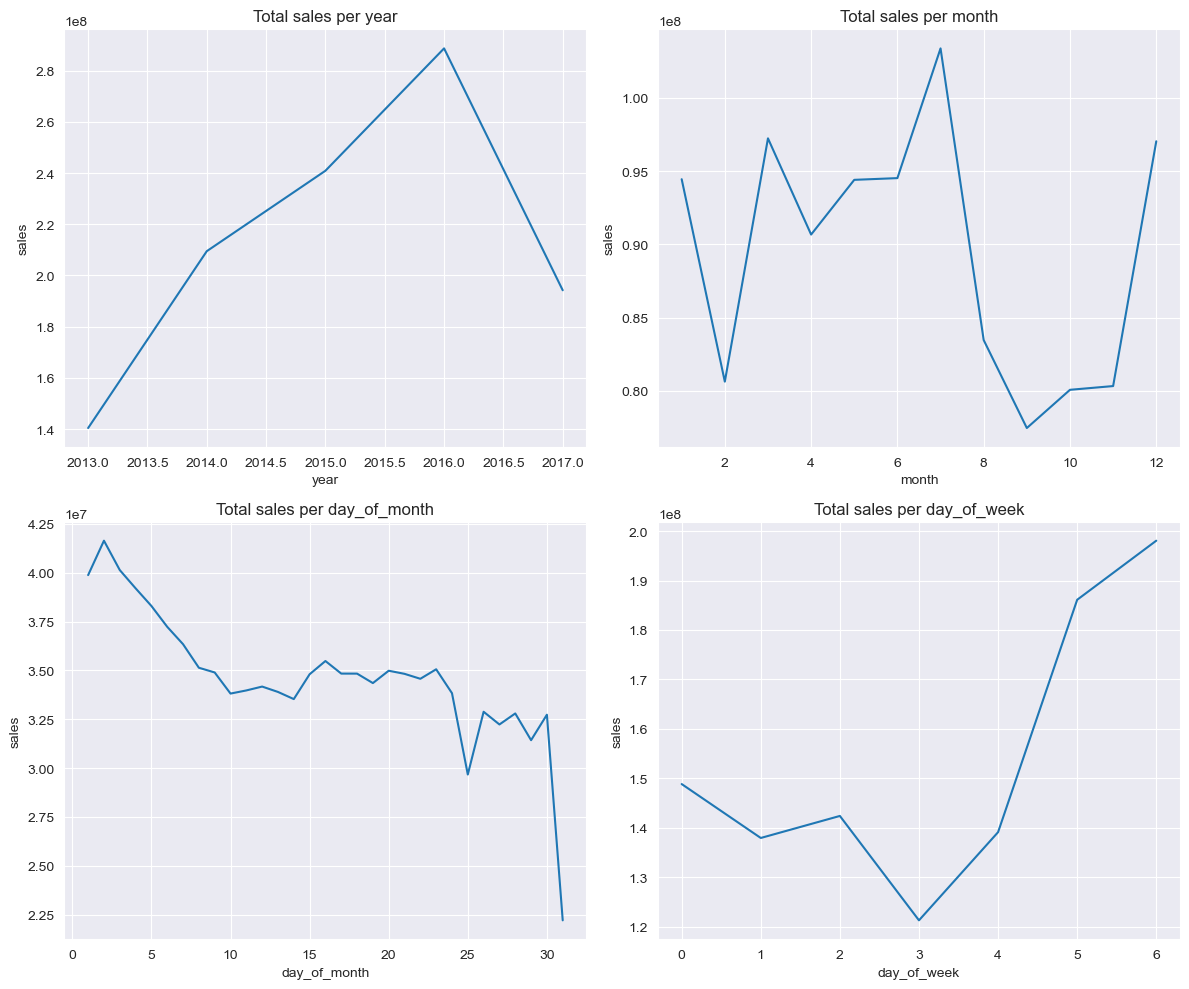

In [30]:
# Total sales per year/month/day_of_month/day_of_week

grouping_columns = ['year', 'month', 'day_of_month', 'day_of_week']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = train.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    f = sns.lineplot(data=grouped_data, x=column, y='sales', ax=axes[ind])
    f.set_title(f'Total sales per {column}')

plt.tight_layout()
plt.show()


In [31]:
# Total onpromotions per family

df_by_onpromotion = train.groupby('family').sum()['onpromotion'].reset_index()
df_by_onpromotion.head(3)

C:\Users\giuli\AppData\Local\Temp\ipykernel_44240\1372110429.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_onpromotion = train.groupby('family').sum()['onpromotion'].reset_index()


,family,onpromotion
0,AUTOMOTIVE,4783
1,BABY CARE,53
2,BEAUTY,13483


Text(0.5, 1.0, 'Total onpromotion per family')

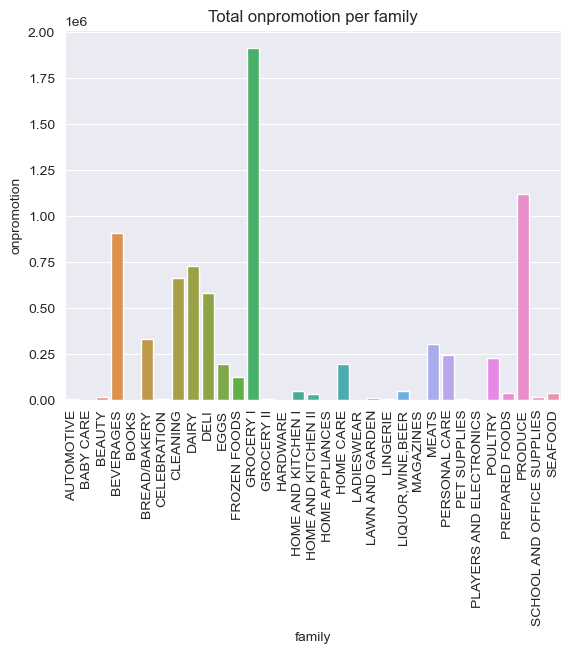

In [32]:
# Barplot of total onpromotion per family

f=sns.barplot(data=df_by_onpromotion, x='family', y='onpromotion')
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title('Total onpromotion per family')

In [33]:
# Total sales by store

sales_by_store=train.groupby('store_nbr').sum()['sales'].reset_index()
sales_by_store.head(3)

C:\Users\giuli\AppData\Local\Temp\ipykernel_44240\1837644601.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_store=train.groupby('store_nbr').sum()['sales'].reset_index()


,store_nbr,sales
0,1,1.414501e+07
1,2,2.155739e+07
2,3,5.048191e+07


Text(0.5, 1.0, 'Total sales by store')

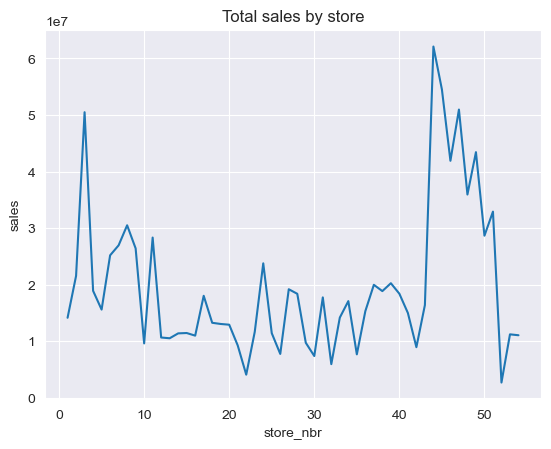

In [34]:
f = sns.lineplot(data=sales_by_store, x='store_nbr', y='sales')
f.set_title('Total sales by store')

In [35]:
# Sales by store sorted

sales_by_store_sorted = sales_by_store.sort_values(by='sales', ascending=False)
sales_by_store_sorted.head()

,store_nbr,sales
43,44,6.208755e+07
44,45,5.449801e+07
46,47,5.094831e+07
2,3,5.048191e+07
48,49,4.342010e+07


In [36]:
# Top 5 stores by sales

print('The top 5 stores are:')

for i in range(0,5):
    print(sales_by_store.sort_values(by='sales', ascending=False).reset_index()['store_nbr'][i])


The top 5 stores are:
44
45
47
3
49


In [37]:
# Merge stores dataframe with sales_by_store_sorted

best_city = pd.merge(sales_by_store_sorted, stores, on='store_nbr', how='left')

In [38]:
# best_city dataframe

best_city.head(10)

,store_nbr,sales,city,state,type,cluster
0,44,6.208755e+07,Quito,Pichincha,A,5
1,45,5.449801e+07,Quito,Pichincha,A,11
2,47,5.094831e+07,Quito,Pichincha,A,14
3,3,5.048191e+07,Quito,Pichincha,D,8
4,49,4.342010e+07,Quito,Pichincha,A,11
5,46,4.189606e+07,Quito,Pichincha,A,14
6,48,3.593313e+07,Quito,Pichincha,A,14
7,51,3.291149e+07,Guayaquil,Guayas,A,17
8,8,3.049429e+07,Quito,Pichincha,D,8
9,50,2.865302e+07,Ambato,Tungurahua,A,14


In [39]:
# Define percentage (of total sales) per city column

best_city['percentage']=0

for city in best_city['city'].unique():
    
     percentage = (best_city.loc[best_city['city'] == city]['sales'].sum())/best_city['sales'].sum()
    
     best_city.loc[best_city['city'] == city, 'percentage'] = percentage

best_city.head(20)        

,store_nbr,sales,city,state,type,cluster,percentage
0,44,6.208755e+07,Quito,Pichincha,A,5,0.518553
1,45,5.449801e+07,Quito,Pichincha,A,11,0.518553
2,47,5.094831e+07,Quito,Pichincha,A,14,0.518553
3,3,5.048191e+07,Quito,Pichincha,D,8,0.518553
4,49,4.342010e+07,Quito,Pichincha,A,11,0.518553
5,46,4.189606e+07,Quito,Pichincha,A,14,0.518553
6,48,3.593313e+07,Quito,Pichincha,A,14,0.518553
7,51,3.291149e+07,Guayaquil,Guayas,A,17,0.114533
8,8,3.049429e+07,Quito,Pichincha,D,8,0.518553
9,50,2.865302e+07,Ambato,Tungurahua,A,14,0.037540


<Figure size 1000x400 with 0 Axes>

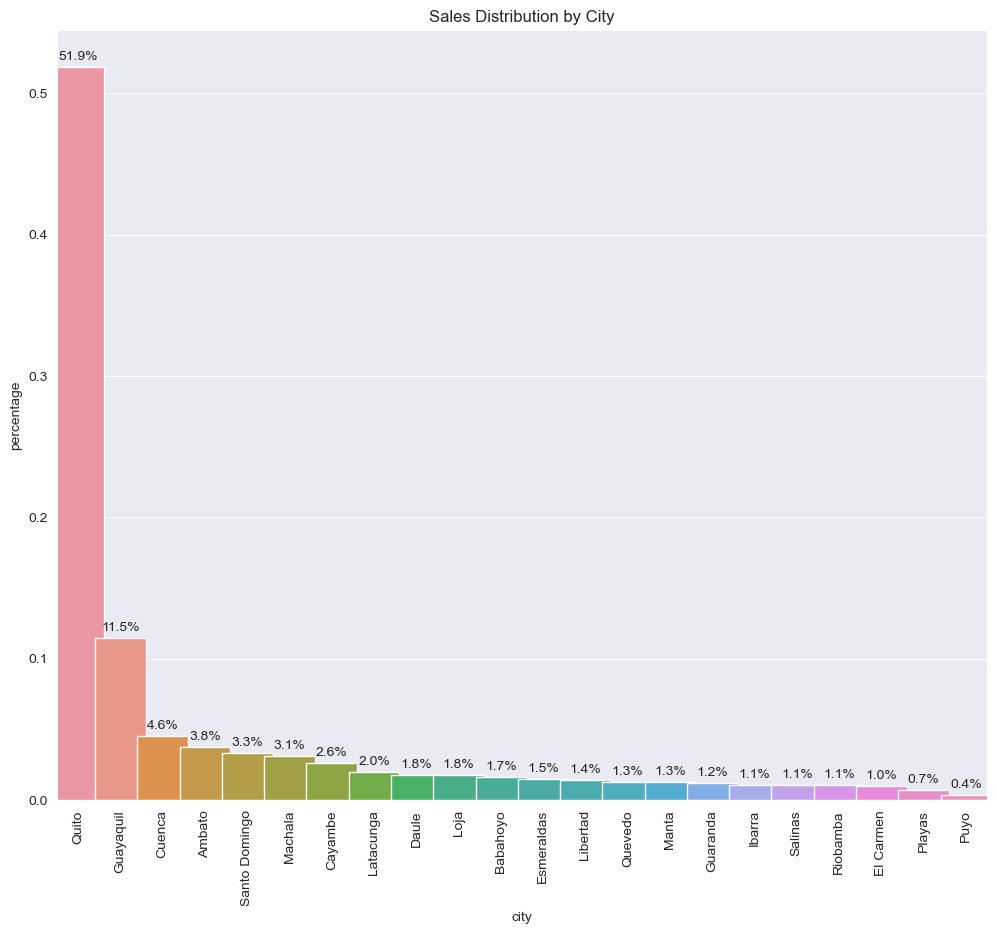

<Figure size 1000x400 with 0 Axes>

In [41]:
#  best_city sorted by percentage

best_city_sorted = best_city.sort_values('percentage',ascending = False)

# Bar plot representing sales distribution by city

fig, axes = plt.subplots(figsize=(12, 10))


f = sns.barplot(data = best_city_sorted, x='city', y='percentage', width=1.2)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title('Sales Distribution by City')

perc = best_city_sorted['percentage'].unique()
perc = perc*100


patches = f.patches

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.005
   f.annotate('{:.001f}%'.format(perc[i]), (x, y), ha='center')
   

plt.figure(figsize=(10,4))

In [42]:
cities = list(best_city.sort_values('percentage',ascending = False).city.unique())

print('Ranking of cities by sales distribution:')
print('\n')
i=0
for city in cities:
    i+=1
    print(i,city)


Ranking of cities by sales distribution:


1 Quito
2 Guayaquil
3 Cuenca
4 Ambato
5 Santo Domingo
6 Machala
7 Cayambe
8 Latacunga
9 Daule
10 Loja
11 Babahoyo
12 Esmeraldas
13 Libertad
14 Quevedo
15 Manta
16 Guaranda
17 Ibarra
18 Salinas
19 Riobamba
20 El Carmen
21 Playas
22 Puyo


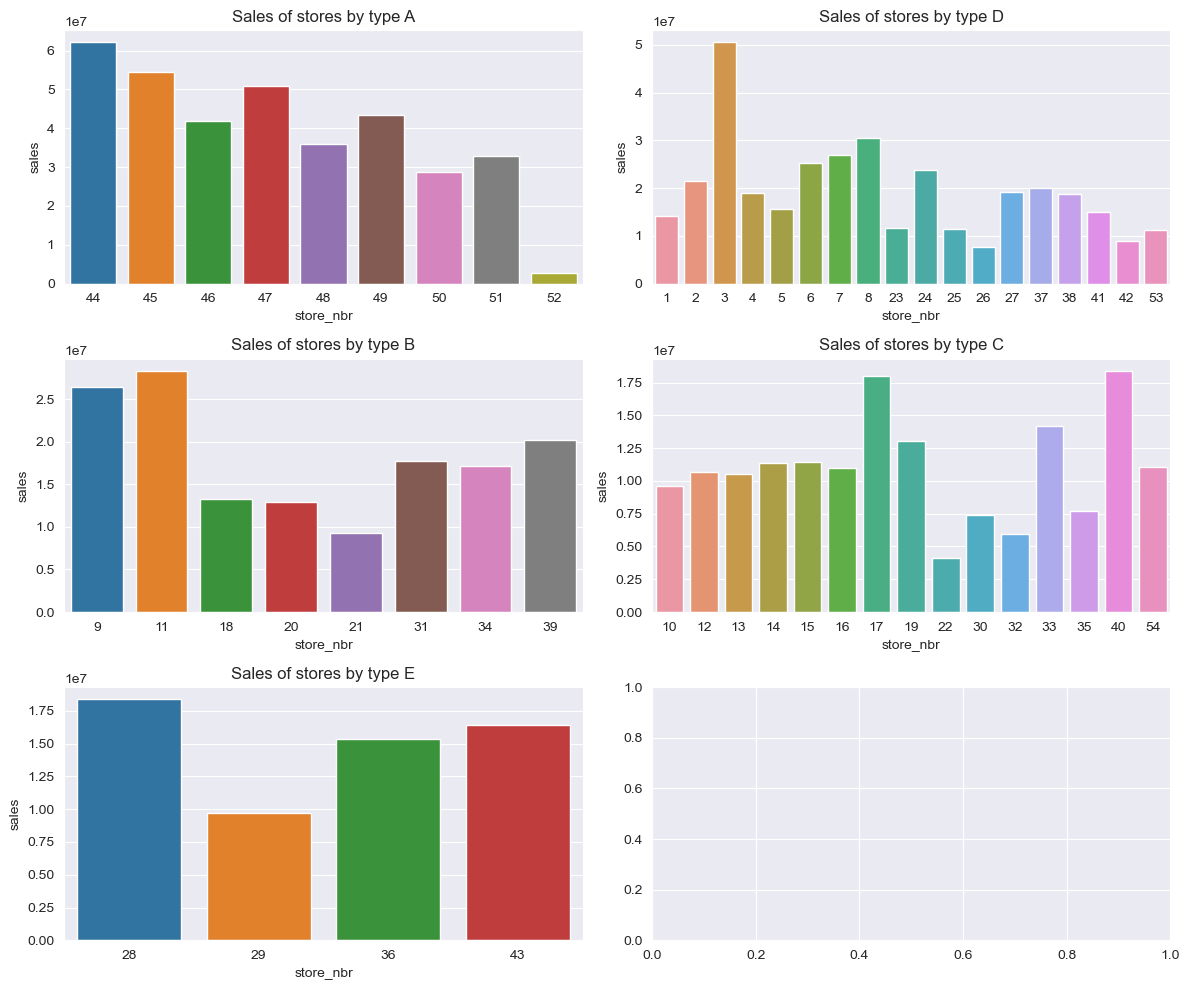

In [43]:
# Total sales of each store by type

my_types = best_city['type'].unique()

fig, axes = plt.subplots(3, 2, figsize=(12,10))
axes = axes.flatten()

for ind, types in enumerate(my_types):
    
    f=sns.barplot(data=best_city, x=best_city[best_city['type']==types]['store_nbr'], y="sales", ax=axes[ind])
    f.set_title('Sales of stores by type {}'.format(types))

plt.tight_layout()



In [44]:
# Define percentage (of total sales) per state column


best_city['state_percentage']=0

for state in best_city['state'].unique():
    
     percentage = (best_city.loc[best_city['state'] == state]['sales'].sum())/best_city['sales'].sum()
    
     best_city.loc[best_city['state'] == state, 'state_percentage'] = percentage

best_city.head(20)        

,store_nbr,sales,city,state,type,cluster,percentage,state_percentage
0,44,6.208755e+07,Quito,Pichincha,A,5,0.518553,0.544936
1,45,5.449801e+07,Quito,Pichincha,A,11,0.518553,0.544936
2,47,5.094831e+07,Quito,Pichincha,A,14,0.518553,0.544936
3,3,5.048191e+07,Quito,Pichincha,D,8,0.518553,0.544936
4,49,4.342010e+07,Quito,Pichincha,A,11,0.518553,0.544936
5,46,4.189606e+07,Quito,Pichincha,A,14,0.518553,0.544936
6,48,3.593313e+07,Quito,Pichincha,A,14,0.518553,0.544936
7,51,3.291149e+07,Guayaquil,Guayas,A,17,0.114533,0.153826
8,8,3.049429e+07,Quito,Pichincha,D,8,0.518553,0.544936
9,50,2.865302e+07,Ambato,Tungurahua,A,14,0.037540,0.037540


In [45]:
# best_city sorted by state_percentage

best_city_state_sorted = best_city.sort_values('state_percentage', ascending = False)

<Figure size 1000x400 with 0 Axes>

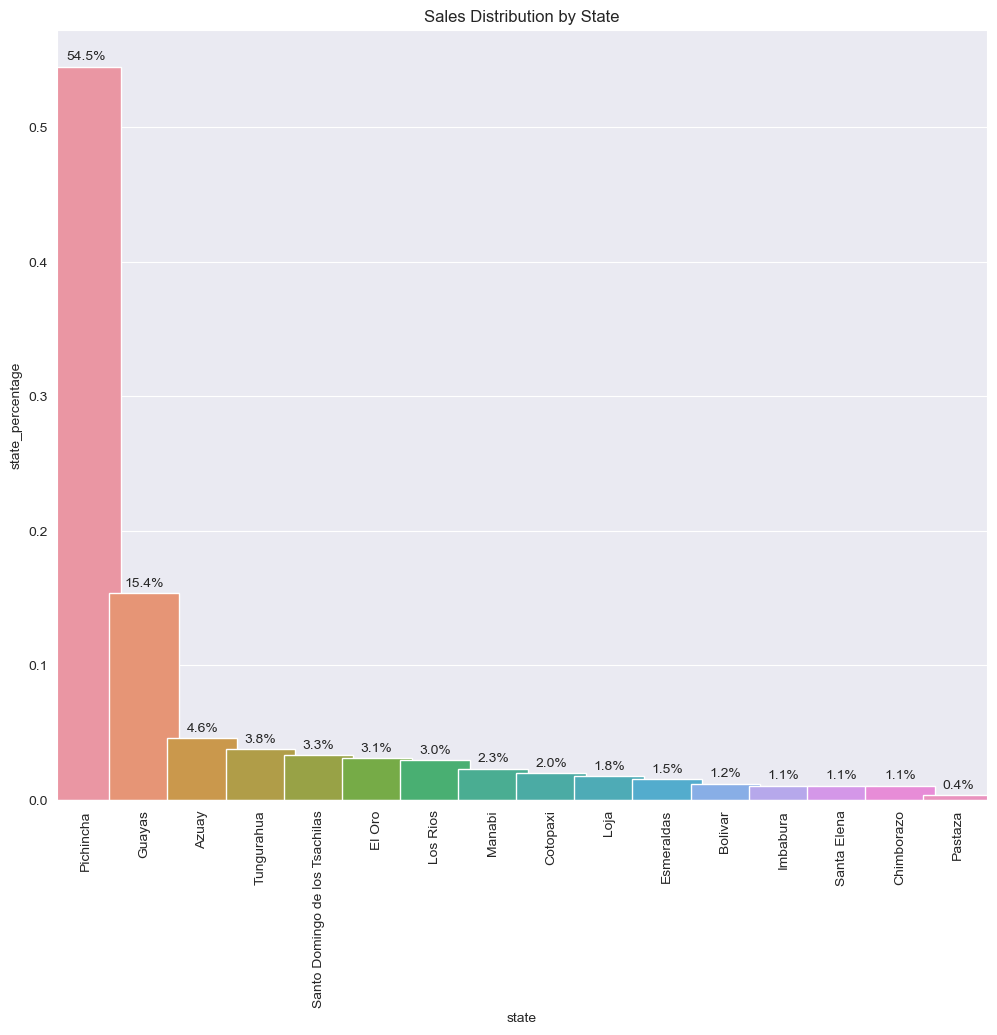

<Figure size 1000x400 with 0 Axes>

In [46]:
# Barplot of sales distribution per state


fig, axes = plt.subplots(figsize=(12, 10))

#order=best_city.sort_values('state_percentage',ascending = False).state.unique()


f = sns.barplot(data = best_city_state_sorted, x='state', y='state_percentage', width=1.2)
f.set_xticklabels(f.get_xticklabels(), rotation=90)
f.set_title('Sales Distribution by State')

perc = best_city_state_sorted['state_percentage'].unique()
perc = perc*100


patches = f.patches

for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.005
   f.annotate('{:.001f}%'.format(perc[i]), (x, y), ha='center')
   

plt.figure(figsize=(10,4))

In [47]:
states = list(best_city.sort_values('state_percentage',ascending = False).state.unique())

print('Ranking of states by sales distribution:')
print('\n')
i = 0
for state in states:
    i=i+1
    print(i, state)
    


Ranking of states by sales distribution:


1 Pichincha
2 Guayas
3 Azuay
4 Tungurahua
5 Santo Domingo de los Tsachilas
6 El Oro
7 Los Rios
8 Manabi
9 Cotopaxi
10 Loja
11 Esmeraldas
12 Bolivar
13 Imbabura
14 Santa Elena
15 Chimborazo
16 Pastaza


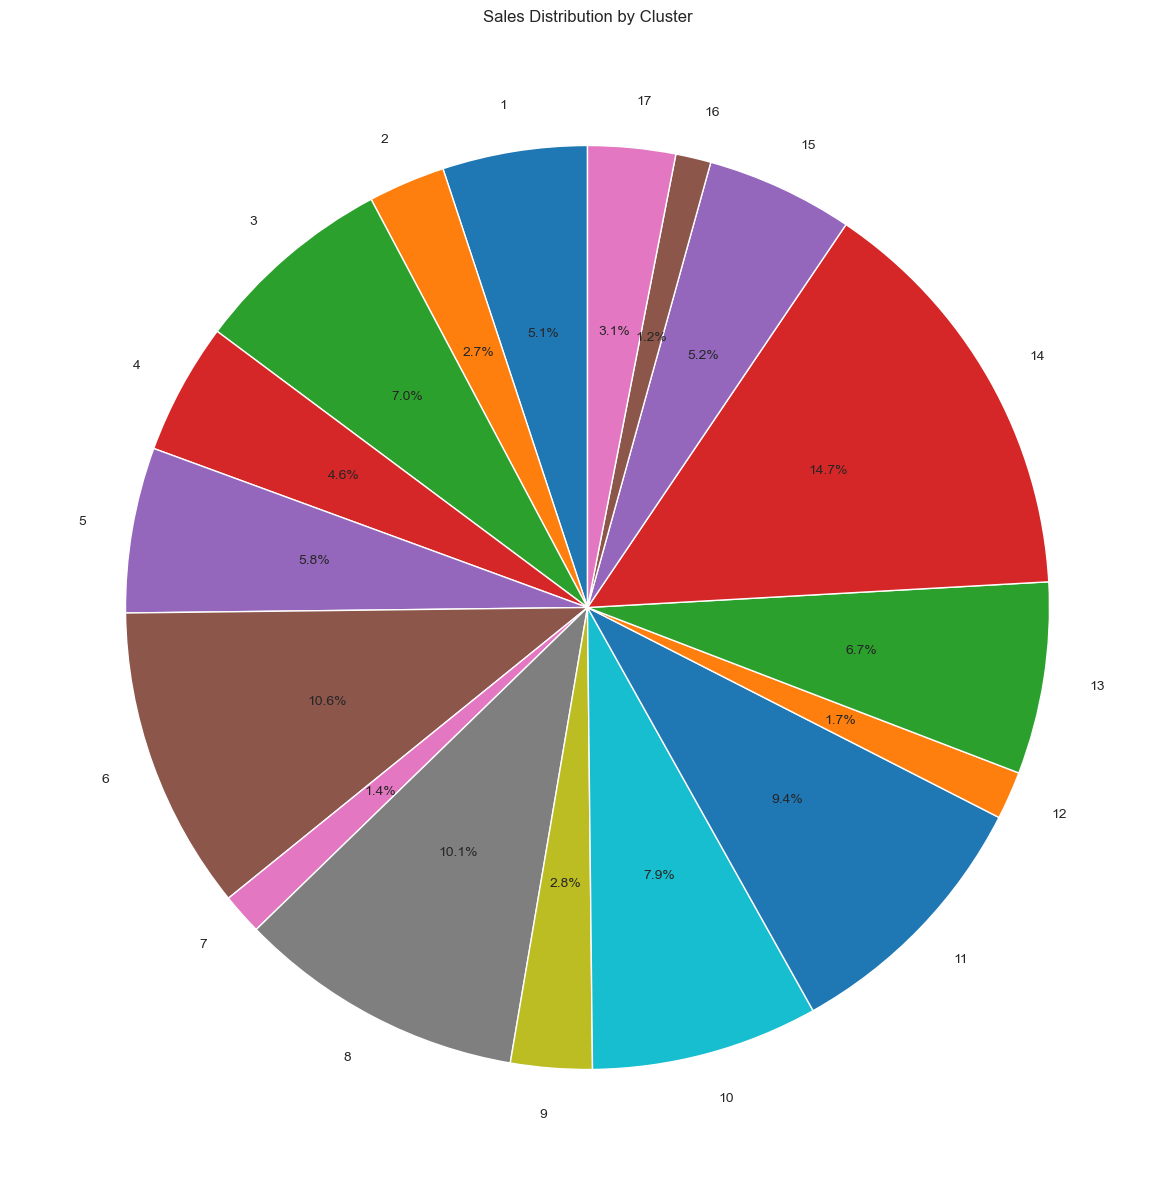

In [48]:
# Pie chart of sales distribution per cluster

data = best_city.groupby('cluster')['sales'].sum()

plt.figure(figsize=(15, 15))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales Distribution by Cluster')

plt.show()

In [49]:
# Head of oil

oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [50]:
# Extract time's features from oil

oil['date'] = oil['date'].apply(str_date)
time(oil)

,date,dcoilwtico,year,month,day_of_month,day_of_week
0,2013-01-01,NaN,2013,1,1,1
1,2013-01-02,93.14,2013,1,2,2
2,2013-01-03,92.97,2013,1,3,3
3,2013-01-04,93.12,2013,1,4,4
4,2013-01-07,93.20,2013,1,7,0
...,...,...,...,...,...,...
1213,2017-08-25,47.65,2017,8,25,4
1214,2017-08-28,46.40,2017,8,28,0
1215,2017-08-29,46.46,2017,8,29,1
1216,2017-08-30,45.96,2017,8,30,2


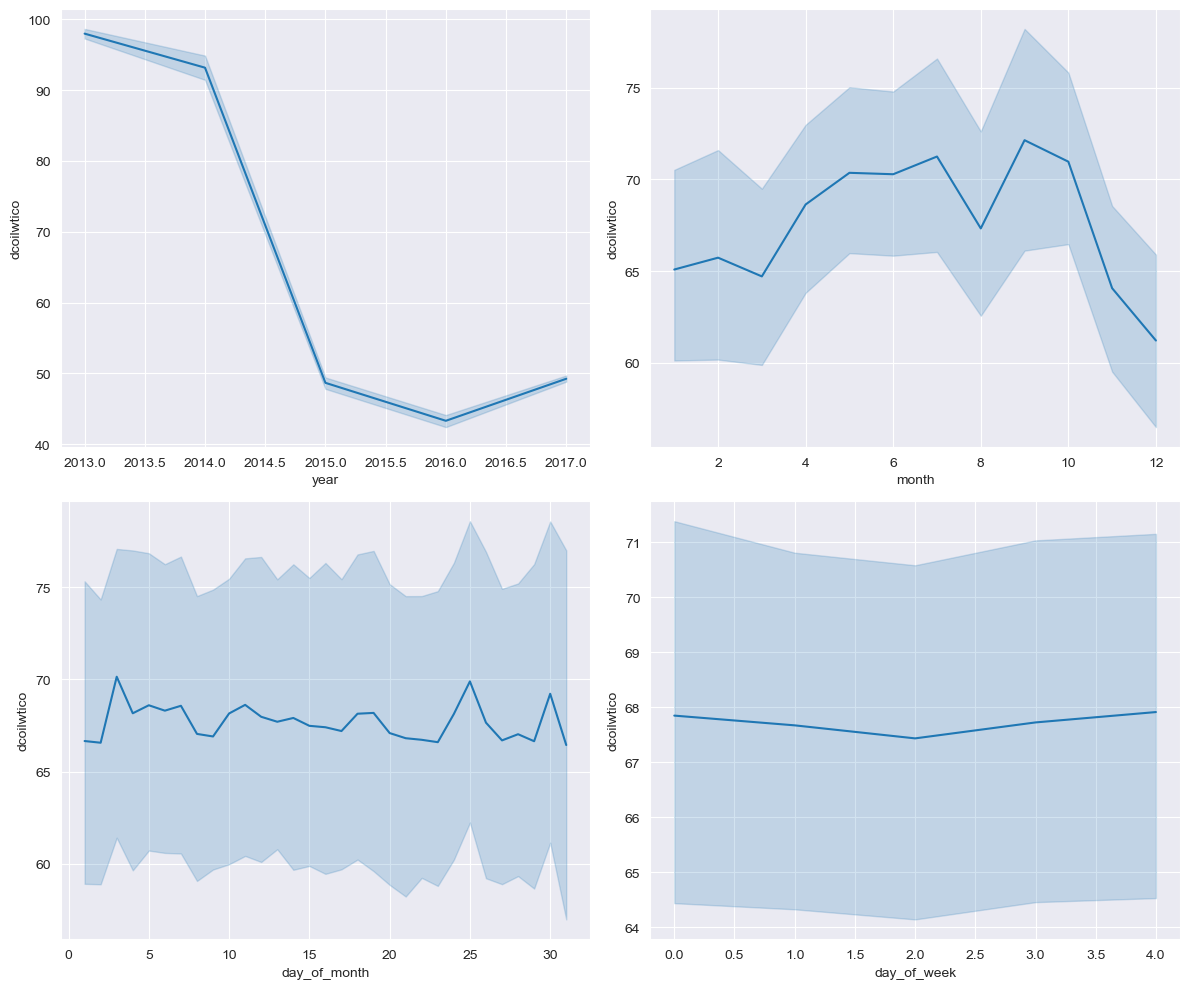

In [52]:
# Oil vs. year/month/day of month/day of week. Confidence interval

grouping_columns = ['year', 'month', 'day_of_month', 'day_of_week']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    #grouped_data = train.groupby(column)['sales'].sum()
    #grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=oil, x=column, y='dcoilwtico', ax=axes[ind])

plt.tight_layout()



<h3 style='color:Red;'>&diams; Handling Missing Values and Feature Engineering <a class="anchor" id="third-bullet"></a>

#### Oil dataframe -  missing values

In [53]:
# Number of missing values in the oil dataframe

oil.isnull().sum()

date             0
dcoilwtico      43
year             0
month            0
day_of_month     0
day_of_week      0
dtype: int64

In [54]:
# Missing values in the oil dataframe

oil_isnull = oil.isnull()
oil_null = oil[oil_isnull['dcoilwtico'] == True].reset_index()
oil_null

,index,date,dcoilwtico,year,month,day_of_month,day_of_week
0,0,2013-01-01,NaN,2013,1,1,1
1,14,2013-01-21,NaN,2013,1,21,0
2,34,2013-02-18,NaN,2013,2,18,0
3,63,2013-03-29,NaN,2013,3,29,4
4,104,2013-05-27,NaN,2013,5,27,0
5,132,2013-07-04,NaN,2013,7,4,3
6,174,2013-09-02,NaN,2013,9,2,0
7,237,2013-11-28,NaN,2013,11,28,3
8,256,2013-12-25,NaN,2013,12,25,2
9,261,2014-01-01,NaN,2014,1,1,2


In [55]:
# Mean value of dcoilwtico per each year

oil_year_mean = oil.groupby('year').mean()['dcoilwtico'].reset_index()
oil_year_mean

C:\Users\giuli\AppData\Local\Temp\ipykernel_44240\4226087799.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oil_year_mean = oil.groupby('year').mean()['dcoilwtico'].reset_index()


,year,dcoilwtico
0,2013,97.982540
1,2014,93.172222
2,2015,48.656706
3,2016,43.293651
4,2017,49.232874


In [56]:
# Define new_oil function


def new_oil(col):
    Oil = col[0]
    Year = col[1]
    
    if pd.isnull(Oil):
        if Year == 2013:
            return 97.982540

        elif Year == 2014:
            return 93.172222
        
        elif Year == 2015:
            return 48.656706
        
        elif Year == 2016:
            return 43.293651

        else:
            return 49.232874

    else:
        return Oil
        

In [57]:
# Apply new_oil function to dcoilwtico and year columns and update dcoilwtico column

oil['dcoilwtico'] = oil[['dcoilwtico','year']].apply(new_oil,axis=1)

In [58]:
oil.head(3)

,date,dcoilwtico,year,month,day_of_month,day_of_week
0,2013-01-01,97.98254,2013,1,1,1
1,2013-01-02,93.14000,2013,1,2,2
2,2013-01-03,92.97000,2013,1,3,3


In [59]:
# Check missing values of oil: no more missing values!

oil.isnull().sum()

date            0
dcoilwtico      0
year            0
month           0
day_of_month    0
day_of_week     0
dtype: int64

#### Merge our dataframes

We want now to merge together our original train dataset with two specific columns of oil dataframe.

In [60]:
# Load the original train dataframe and save it on df_train

df_train = pd.read_csv('train.csv')

In [61]:
# Apply str_date to date column of df_train

df_train['date'] = df_train['date'].apply(str_date)

In [62]:
# Columns of df_train

df_train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [63]:
# Drop out the id column

df_train.drop('id', axis=1)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [64]:
# Select date and dcoilwtico columns from oil and save them on oil_new

oil_new = oil[['date','dcoilwtico']]
oil_new.head()

,date,dcoilwtico
0,2013-01-01,97.98254
1,2013-01-02,93.14000
2,2013-01-03,92.97000
3,2013-01-04,93.12000
4,2013-01-07,93.20000


In [65]:
# We merge df_train with oil_new

oil_train = pd.merge(df_train, oil_new, on='date', how='inner')

In [66]:
oil_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,97.98254
1,1,2013-01-01,1,BABY CARE,0.0,0,97.98254
2,2,2013-01-01,1,BEAUTY,0.0,0,97.98254
3,3,2013-01-01,1,BEVERAGES,0.0,0,97.98254
4,4,2013-01-01,1,BOOKS,0.0,0,97.98254


In [67]:
oil_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
dtype: int64

Let us now merge oil_train with stores dataframe.

In [68]:
# Merge oil_train with stores

oil_train_store = pd.merge(oil_train, stores, on='store_nbr', how='inner')

In [69]:
oil_train_store.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,97.98254,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,97.98254,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,97.98254,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,97.98254,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,97.98254,Quito,Pichincha,D,13


In [70]:
# Apply time to oil_train_store

time(oil_train_store)

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,year,month,day_of_month,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143741,3000883,2017-08-15,9,POULTRY,438.133,0,47.57000,Quito,Pichincha,B,6,2017,8,15,1
2143742,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57000,Quito,Pichincha,B,6,2017,8,15,1
2143743,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57000,Quito,Pichincha,B,6,2017,8,15,1
2143744,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57000,Quito,Pichincha,B,6,2017,8,15,1


####  Correlation between the oil's markt trend and sales of the top 2 states

#### <u>Pichincha

In [71]:
# Select from oil_train_store dataframe data relative to Pichincha state

df_Pichincha = oil_train_store[oil_train_store['state']=='Pichincha']

In [72]:

grouped_Pichincha = df_Pichincha.groupby('year')['sales'].sum()
grouped_Pichincha = pd.DataFrame(grouped_Pichincha).reset_index()

    

<Axes: xlabel='year', ylabel='sales'>

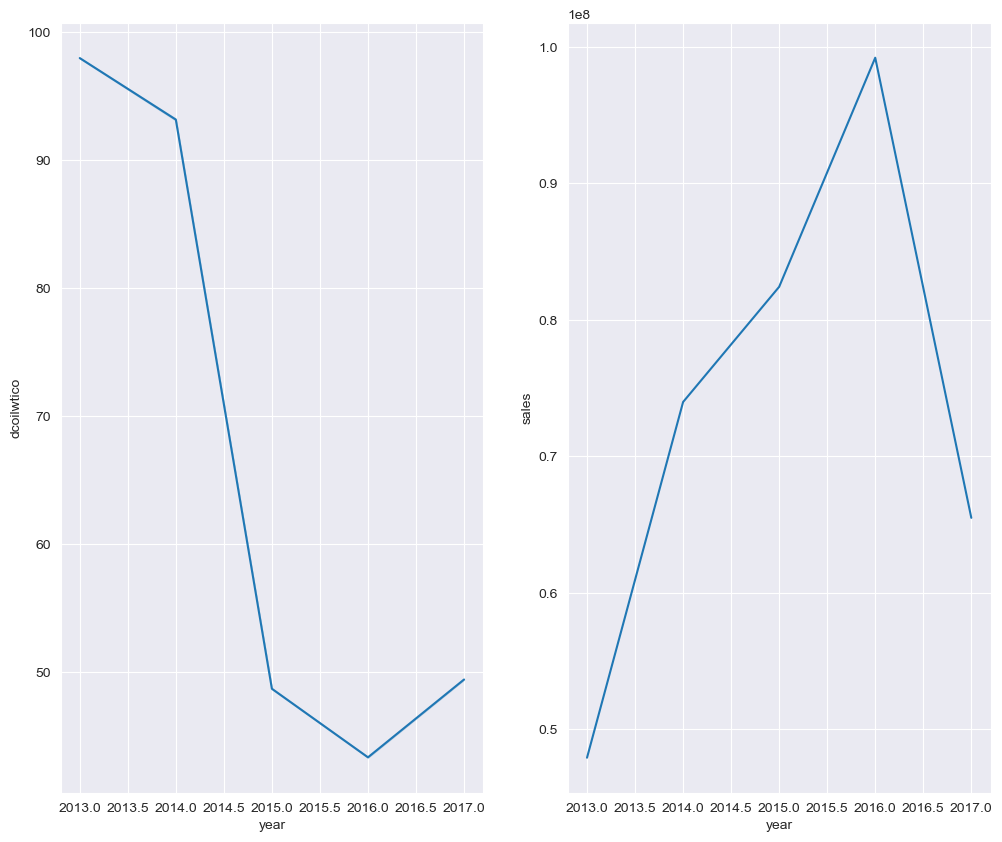

In [73]:
# Lineplot from seaborn library. We plot two picture: the first representing oil's markt trend from 2013 to 2017.
# The second represent how total sales of Pichincha varies over the same time period.


fig, axes = plt.subplots(1, 2, figsize=(12, 10))

sns.lineplot(data=df_Pichincha , x='year', y='dcoilwtico', ax=axes[0])
sns.lineplot(data=grouped_Pichincha, x='year', y='sales', ax=axes[1])

#### <u>Guayas

In [74]:
df_Guayas = oil_train_store[oil_train_store['state']=='Guayas']

In [75]:
grouped_Guayas = df_Guayas.groupby('year')['sales'].sum()
grouped_Guayas = pd.DataFrame(grouped_Guayas).reset_index()

<Axes: xlabel='year', ylabel='sales'>

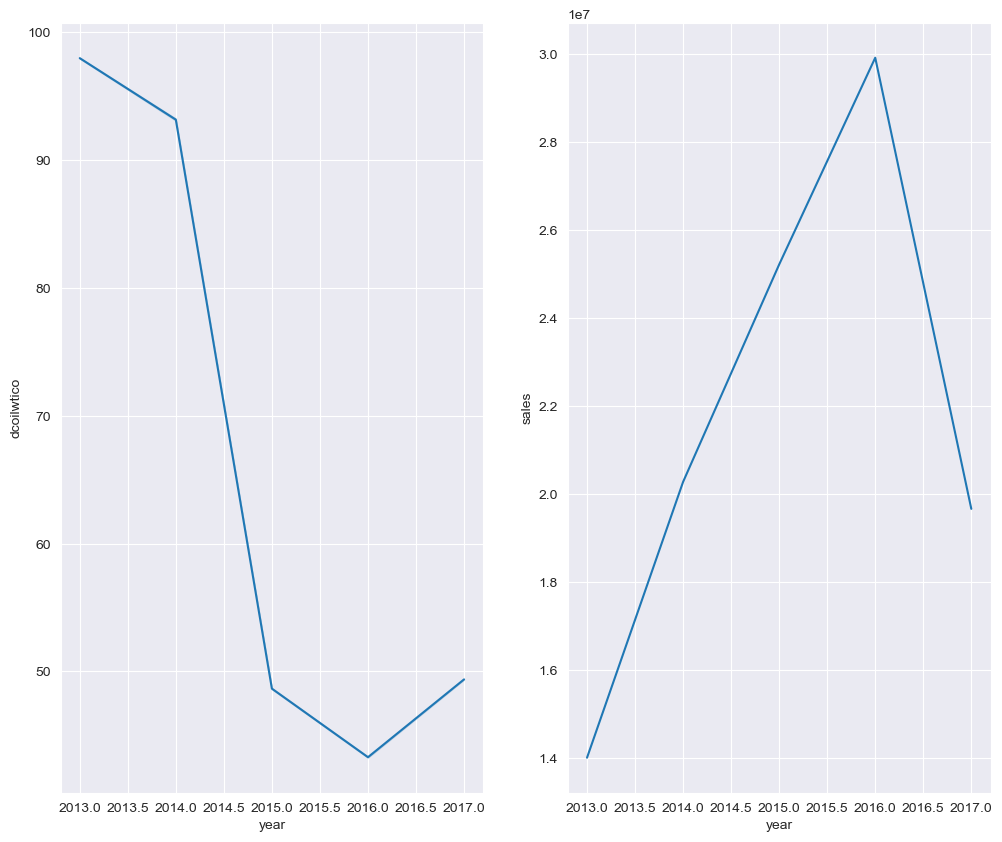

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

sns.lineplot(data=df_Guayas , x='year', y='dcoilwtico', ax=axes[0])
sns.lineplot(data=grouped_Guayas, x='year', y='sales', ax=axes[1])

#### Holiday dataframe - missing values

In [77]:
hol.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


<Axes: xlabel='type', ylabel='count'>

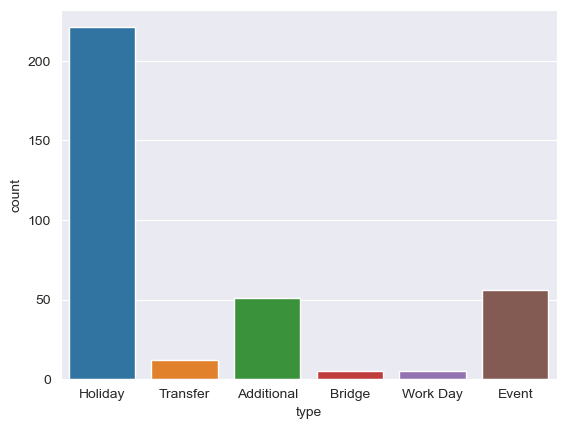

In [78]:
sns.countplot(hol, x='type')

In [79]:
hol_work_day = hol[hol['type'] == 'Work Day']

In [80]:
hol_work_day

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


<Axes: xlabel='locale', ylabel='count'>

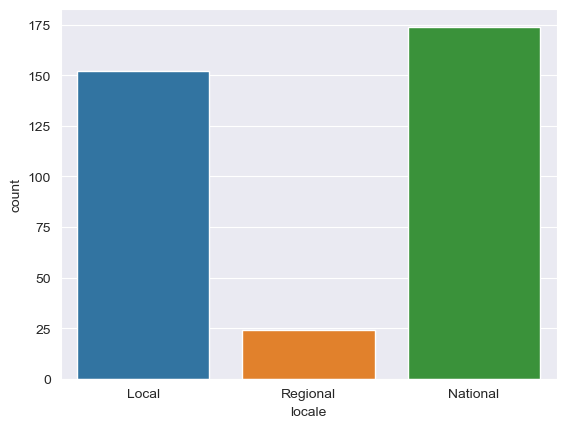

In [81]:
sns.countplot(hol, x='locale')

<Axes: xlabel='transferred', ylabel='count'>

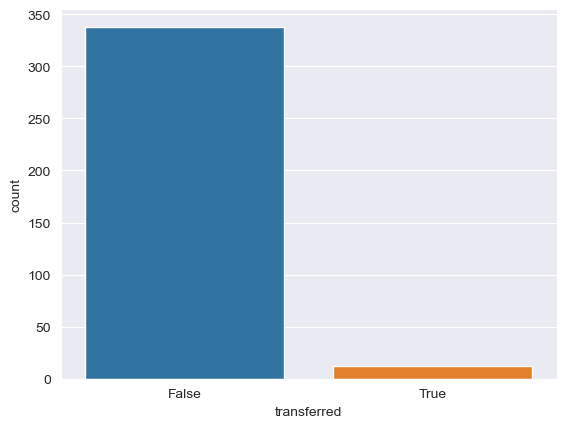

In [82]:
sns.countplot(hol, x='transferred')

In [83]:
# Check missing values of hol

hol.isnull().sum()


date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [84]:
print('Dataframe hol has no missing values!')

Dataframe hol has no missing values!


In [85]:
# Transform the type of date column

hol['date'] = pd.to_datetime(hol['date'])


We merge train with hol dataframe.

In [86]:
# Define train_hol by merging train with oil

train_hol = pd.merge(train, hol, how='left', on='date')

In [87]:
# Number of missing values of train_hol

train_hol.isnull().sum()

date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
month                 0
day_of_month          0
day_of_week           0
type            2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [88]:
# Missing values of train_hol

train_hol_null = train_hol[train_hol['type'].isnull() == True].reset_index()
train_hol_null

,index,date,store_nbr,family,sales,onpromotion,year,month,day_of_month,day_of_week,type,locale,locale_name,description,transferred
0,1782,2013-01-02,1,AUTOMOTIVE,2.000,0,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
1,1783,2013-01-02,1,BABY CARE,0.000,0,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
2,1784,2013-01-02,1,BEAUTY,2.000,0,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
3,1785,2013-01-02,1,BEVERAGES,1091.000,0,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
4,1786,2013-01-02,1,BOOKS,0.000,0,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551819,3052561,2017-08-14,9,POULTRY,283.429,0,2017,8,14,0,NaN,NaN,NaN,NaN,NaN
2551820,3052562,2017-08-14,9,PREPARED FOODS,114.120,0,2017,8,14,0,NaN,NaN,NaN,NaN,NaN
2551821,3052563,2017-08-14,9,PRODUCE,1348.425,7,2017,8,14,0,NaN,NaN,NaN,NaN,NaN
2551822,3052564,2017-08-14,9,SCHOOL AND OFFICE SUPPLIES,182.000,11,2017,8,14,0,NaN,NaN,NaN,NaN,NaN


In [89]:
# Remove missing values of locale column from train_hol

train_hol_nnull = train_hol.dropna(subset=['locale'])
train_hol_nnull.head()

,date,store_nbr,family,sales,onpromotion,year,month,day_of_month,day_of_week,type,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False


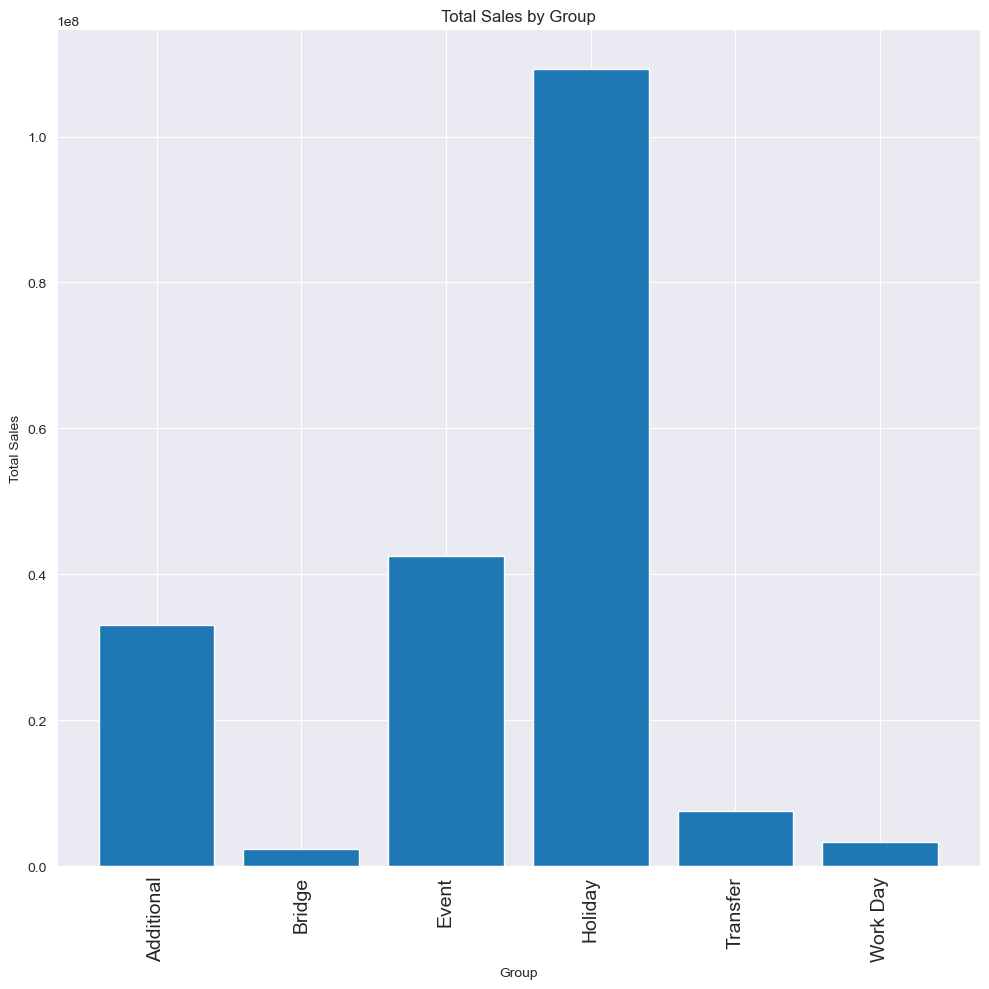

In [90]:
# Total Sales by group

grouped_data = train_hol_nnull.groupby(['type'])['sales'].sum()

grouped_data = grouped_data.reset_index()

plt.figure(figsize=(10, 10))
plt.bar(range(len(grouped_data)), grouped_data['sales'])
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Group')
plt.xticks(range(len(grouped_data)), grouped_data['type'], rotation=90, fontsize=14)
plt.tight_layout()
plt.show()

In [91]:
train_hol.head(3)

,date,store_nbr,family,sales,onpromotion,year,month,day_of_month,day_of_week,type,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,Ecuador,Primer dia del ano,False


In [92]:
# Fill missing values in type, transferred and locale columns

train_hol['type'] = train_hol['type'].fillna('Work Day')
train_hol['transferred'] = train_hol['transferred'].fillna(False)
train_hol['locale'] = train_hol['locale'].fillna('National')

In [93]:
# Drop locale_name and description columns

df1 = train_hol.drop(['locale_name','description'], axis=1)
df1.head()

,date,store_nbr,family,sales,onpromotion,year,month,day_of_month,day_of_week,type,locale,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Holiday,National,False
1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Holiday,National,False
2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Holiday,National,False
3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Holiday,National,False
4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Holiday,National,False


In [94]:
# Check missing values

df1.isnull().sum()

date            0
store_nbr       0
family          0
sales           0
onpromotion     0
year            0
month           0
day_of_month    0
day_of_week     0
type            0
locale          0
transferred     0
dtype: int64

In [98]:
# Final dataframe

df = oil_train_store.drop('id', axis = 1)
df.head()

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,year,month,day_of_month,day_of_week
0,2013-01-01,1,AUTOMOTIVE,0.0,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.0,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.0,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
3,2013-01-01,1,BEVERAGES,0.0,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1
4,2013-01-01,1,BOOKS,0.0,0,97.98254,Quito,Pichincha,D,13,2013,1,1,1


In [105]:
# Get dummies of cathegorical_features 

dummies_df = pd.get_dummies(df)

In [106]:
dummies_df.head()

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,year,month,day_of_month,day_of_week,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,2013-01-01,1,0.0,0,97.98254,13,2013,1,1,1,...,0,1,0,0,0,0,0,0,1,0
1,2013-01-01,1,0.0,0,97.98254,13,2013,1,1,1,...,0,1,0,0,0,0,0,0,1,0
2,2013-01-01,1,0.0,0,97.98254,13,2013,1,1,1,...,0,1,0,0,0,0,0,0,1,0
3,2013-01-01,1,0.0,0,97.98254,13,2013,1,1,1,...,0,1,0,0,0,0,0,0,1,0
4,2013-01-01,1,0.0,0,97.98254,13,2013,1,1,1,...,0,1,0,0,0,0,0,0,1,0


<h3 style='color:Red;'>&diams; ML - Random Forest and Gradient Boosting Regressions <a > <a class="anchor" id="sixth-bullet"></a>

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [108]:
# Select features and target
X = dummies_df.drop(['date','sales'], axis = 1)

# Target variable
y = dummies_df['sales']  



In [109]:
# Split the training data into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

In [110]:
# Initialize the base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=1,n_jobs=-1)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=1)

# Initialize the meta-model
meta_model = LinearRegression()

# Create the StackingRegressor
stacking_model = StackingRegressor(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    final_estimator=meta_model
)




In [112]:
from xgboost import XGBRegressor

import catboost as cb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

scaler = StandardScaler()

model_cb = cb.CatBoostRegressor(verbose=False)
model_xgb = XGBRegressor(verbosity=0)

pipeline_cb = Pipeline([
    ('scaler', scaler),
    ('model_cb', model_cb) 
])

pipeline_xgb = Pipeline([
    ('scaler', scaler), 
    ('model_xgb', model_xgb)
])



In [113]:
pipeline_cb.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [114]:
y_pred_cb = pipeline_cb.predict(X_val)
y_pred_xgb = pipeline_xgb.predict(X_val)

y_pred_combined = 0.5 * y_pred_cb + 0.5 * y_pred_xgb



In [115]:
msle = mean_squared_log_error(abs(y_val), abs(y_pred_combined), squared=False)
print("Mean Squared Log Error:", msle)

Mean Squared Log Error: 1.9719203812486048


<h3 style='color:Red;'>&diams; Reformat the test data and make predictions <a class="anchor" id="seventh-bullet"></a>

In [116]:
# Make predictions on the test data

test = pd.read_csv('test.csv') 

In [117]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [118]:
test['date'] = test['date'].apply(str_date)

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [120]:
oil_test = pd.merge(test, oil_new, on='date', how='left')

In [121]:
oil_test.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8
1,3000889,2017-08-16,1,BABY CARE,0,46.8
2,3000890,2017-08-16,1,BEAUTY,2,46.8
3,3000891,2017-08-16,1,BEVERAGES,20,46.8
4,3000892,2017-08-16,1,BOOKS,0,46.8


In [122]:
oil_test.shape

(28512, 6)

In [123]:
oil_new.shape

(1218, 2)

In [124]:
oil_test_store = pd.merge(oil_test, stores, on='store_nbr', how='left')

In [125]:
oil_test_store.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13


In [126]:
time(oil_test_store)

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster,year,month,day_of_month,day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.80,Quito,Pichincha,D,13,2017,8,16,2
1,3000889,2017-08-16,1,BABY CARE,0,46.80,Quito,Pichincha,D,13,2017,8,16,2
2,3000890,2017-08-16,1,BEAUTY,2,46.80,Quito,Pichincha,D,13,2017,8,16,2
3,3000891,2017-08-16,1,BEVERAGES,20,46.80,Quito,Pichincha,D,13,2017,8,16,2
4,3000892,2017-08-16,1,BOOKS,0,46.80,Quito,Pichincha,D,13,2017,8,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,47.26,Quito,Pichincha,B,6,2017,8,31,3
28508,3029396,2017-08-31,9,PREPARED FOODS,0,47.26,Quito,Pichincha,B,6,2017,8,31,3
28509,3029397,2017-08-31,9,PRODUCE,1,47.26,Quito,Pichincha,B,6,2017,8,31,3
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,47.26,Quito,Pichincha,B,6,2017,8,31,3


In [127]:
oil_test_store.head()

,id,date,store_nbr,family,onpromotion,dcoilwtico,city,state,type,cluster,year,month,day_of_month,day_of_week
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,2017,8,16,2
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,2017,8,16,2
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,2017,8,16,2
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,2017,8,16,2
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,2017,8,16,2


In [128]:
oil_test_store.shape

(28512, 14)

In [129]:
oil_test_store.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
dcoilwtico      7128
city               0
state              0
type               0
cluster            0
year               0
month              0
day_of_month       0
day_of_week        0
dtype: int64

In [130]:
oil_test_store['dcoilwtico'] = oil_test_store[['dcoilwtico','year']].apply(new_oil,axis=1)

In [131]:
oil_test_store.isnull().sum()

id              0
date            0
store_nbr       0
family          0
onpromotion     0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
year            0
month           0
day_of_month    0
day_of_week     0
dtype: int64

In [132]:
oil_test_store.shape

(28512, 14)

In [133]:
dummies_oil_test_store= pd.get_dummies(oil_test_store)

In [134]:
X_oil_test_store = dummies_oil_test_store.drop(['id','date'], axis = 1)

In [135]:
X_oil_test_store.head()

,store_nbr,onpromotion,dcoilwtico,cluster,year,month,day_of_month,day_of_week,family_AUTOMOTIVE,family_BABY CARE,...,state_Pastaza,state_Pichincha,state_Santa Elena,state_Santo Domingo de los Tsachilas,state_Tungurahua,type_A,type_B,type_C,type_D,type_E
0,1,0,46.8,13,2017,8,16,2,1,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,46.8,13,2017,8,16,2,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1,2,46.8,13,2017,8,16,2,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,20,46.8,13,2017,8,16,2,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,46.8,13,2017,8,16,2,0,0,...,0,1,0,0,0,0,0,0,1,0


In [136]:
X_oil_test_store.isnull().sum()

store_nbr      0
onpromotion    0
dcoilwtico     0
cluster        0
year           0
              ..
type_A         0
type_B         0
type_C         0
type_D         0
type_E         0
Length: 84, dtype: int64

In [137]:
y_pred_test_cb = pipeline_cb.predict(X_oil_test_store)
y_pred_test_xgb = pipeline_xgb.predict(X_oil_test_store)

y_pred_test_combined = 0.5 * y_pred_test_cb + 0.5 * y_pred_test_xgb


In [138]:
y_pred_test_combined

array([ 2.12623730e+00,  1.32587320e+00, -5.29257976e+01, ...,
        1.39813964e+03,  1.15609416e+02,  5.99114992e+00])

In [139]:
test.reset_index(inplace = True)

In [140]:
predictions = pd.DataFrame(y_pred_test_combined)
predictions.rename(columns = {0:'sales'}, inplace = True) 


In [141]:
predictions

,sales
0,2.126237
1,1.325873
2,-52.925798
3,2305.274568
4,0.017377
...,...
28507,349.435701
28508,76.997694
28509,1398.139637
28510,115.609416


In [142]:
submissions= pd.concat([oil_test_store['id'], predictions['sales'] ],axis=1)

In [143]:
submissions.head()

,id,sales
0,3000888,2.126237
1,3000889,1.325873
2,3000890,-52.925798
3,3000891,2305.274568
4,3000892,0.017377


In [144]:
submissions.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [145]:
submissions.isnull().sum()

id       0
sales    0
dtype: int64

In [146]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 668.2 KB


In [147]:
oil_test_store.shape

(28512, 14)

In [148]:
test.shape

(28512, 6)

In [149]:
submissions.shape

(28512, 2)